In [1]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
ascii_str = string.printable
digits_str = string.digits
punctuation_str = string.punctuation
stop_words = stopwords.words('english')

In [3]:
CONSUMER_KEY    = 'sgnMyuK8lGUMZgVaiqJ37iXsz'
CONSUMER_SECRET = 'yanixPFg2bYPjg12REJPJmoNqAlvgTNnwRQ9YbT3LUZMwQiPsC'

# Access:
ACCESS_TOKEN  = '1054364305649471488-ZSB7vUoZErVJSy2Fl9ZOmzYqPrdI0N'
ACCESS_SECRET = 'mqlpW0N9LCYShS4ITwseFpcH4Rcw8rgQvbY1LOlhII7Cm'

In [4]:
# from credentials import *   

In [5]:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    
    return api

In [6]:
extractor = twitter_setup()
# extractor

In [7]:
tweet_text=[]
for status in tweepy.Cursor(extractor.user_timeline, screen_name='realDonaldTrump',count=200).items():
    tweet_text.append(status._json)

In [8]:
def twitter_setup_dic():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth,wait_on_rate_limit=True,parser=tweepy.parsers.JSONParser())
    
    return api
extractor_dic = twitter_setup_dic()

In [11]:
# We create a tweet list as follows:
tweets = extractor_dic.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))
# print(tweets[0])
# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets:
    str_=tweet["text"].lower()
    str_= re.sub(r':.*$', "", str_)
    str_=str_.split()
    str_ = " ".join([word for word in str_ if word not in "https"])
    str_ = "".join([word for word in str_ if word not in punctuation_str])
    str_ = "".join([word for word in str_ if word in list(ascii_str)])
    tweet["text"]=str_
tweets[0]

Number of tweets extracted: 200.

5 recent tweets:



{'created_at': 'Mon Nov 26 11:19:41 +0000 2018',
 'id': 1067015026995879937,
 'id_str': '1067015026995879937',
 'text': 'mexico should move the flag waving migrants many of whom are stone cold criminals back to their countries do it',
 'truncated': True,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/IqgnrBTQFl',
    'expanded_url': 'https://twitter.com/i/web/status/1067015026995879937',
    'display_url': 'twitter.com/i/web/status/1…',
    'indices': [116, 139]}]},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 25073877,
  'id_str': '25073877',
  'name': 'Donald J. Trump',
  'screen_name': 'realDonaldTrump',
  'location': 'Washington, DC',
  'description': '45th President of the United States of Americ

In [ ]:
date = pd.DataFrame([tweet["created_at"] for tweet in tweets],columns=['date'])
date.head()

In [12]:
data = pd.DataFrame(data=[tweet["text"] for tweet in tweets],columns=['Tweets'])
data.head()

,Tweets
0,mexico should move the flag waving migrants ma...
1,children from parents as did bush etc because ...
2,60minutes did a phony story about child separa...
3,clinton foundation donations drop 42 which sh...
4,europe has to pay their fair share for militar...


In [ ]:
# def token(texts):
#     if type(texts) is str:
#         texts = texts.lower()
#         texts= re.sub(r':.*$', "", texts)
#         token_text = " ".join([w for w in texts.split()])
#         str_ = "".join([word for word in token_text if word not in "https"])
#         return str_
# data['tweet_token'] = data['Tweets'].apply(lambda x: token(x)).astype('str') 

In [ ]:
# def remove_pun(texts):
#     texts = texts.lower()
#     remove_pun = "".join([word for word in texts if word not in punctuation_str])
##         clean_data = "".join([word for word in remove_pun if word in list(ascii_str)])
#     return remove_pun

# data['tweet_nopun'] = data['tweet_token'].apply(lambda x: remove_pun(x))

In [ ]:
# def remove_ascii(texts):
#     clean_data = "".join([word for word in texts if word in list(ascii_str)])
#     return clean_data

# data['no_ascii'] = data['tweet_nopun'].apply(lambda x: remove_ascii(x))

In [ ]:
# def remove_stop(texts):
#     word_tokens = word_tokenize(texts.lower()) 
  
#     clean_data = " ".join([word for word in word_tokens if word not in stop_words])
# #     print(clean_data)
#     return clean_data

# data['no_stopwords'] = data['no_ascii'].apply(lambda x: remove_stop(x))

In [ ]:
# tweet_data = pd.DataFrame({"tweets":data['no_stopwords']})

In [ ]:
# tweet_data.head()

In [ ]:
# tweets_list=list(tweet_data.tweets)
# date_list=list(date.date)

In [ ]:
# text_dic=dict(zip(date_list,tweets_list))
# date_tweets_list=[]
# for k,v in text_dic.items():
#     date_tweets_list.append({k:v})
# date_tweets_list

In [ ]:
# my_dictionary={}
# for t in tweets:
#     for dtl in date_tweets_list :
#         my_dictionary={**t ,**dtl}
# my_dictionary

In [ ]:
dir(tweets[0])

In [ ]:
# for t in tweets:
#     del t["created_at"]
    

In [ ]:
# for t in tweets:
#     del t["text"]

In [13]:
data['len']  = np.array([len(tweet["text"]) for tweet in tweets])
data['ID']   = np.array([tweet["id"] for tweet in tweets])
data['Date'] = np.array([tweet["created_at"] for tweet in tweets])
data['Source'] = np.array([tweet["source"] for tweet in tweets])
data['Likes']  = np.array([tweet["favorite_count"] for tweet in tweets])
data['RTs']    = np.array([tweet["retweet_count"] for tweet in tweets])

In [14]:
mean = np.mean(data['len'])
mean

88.135

In [15]:
fav_max = np.max(data['Likes'])
fav_max

253355

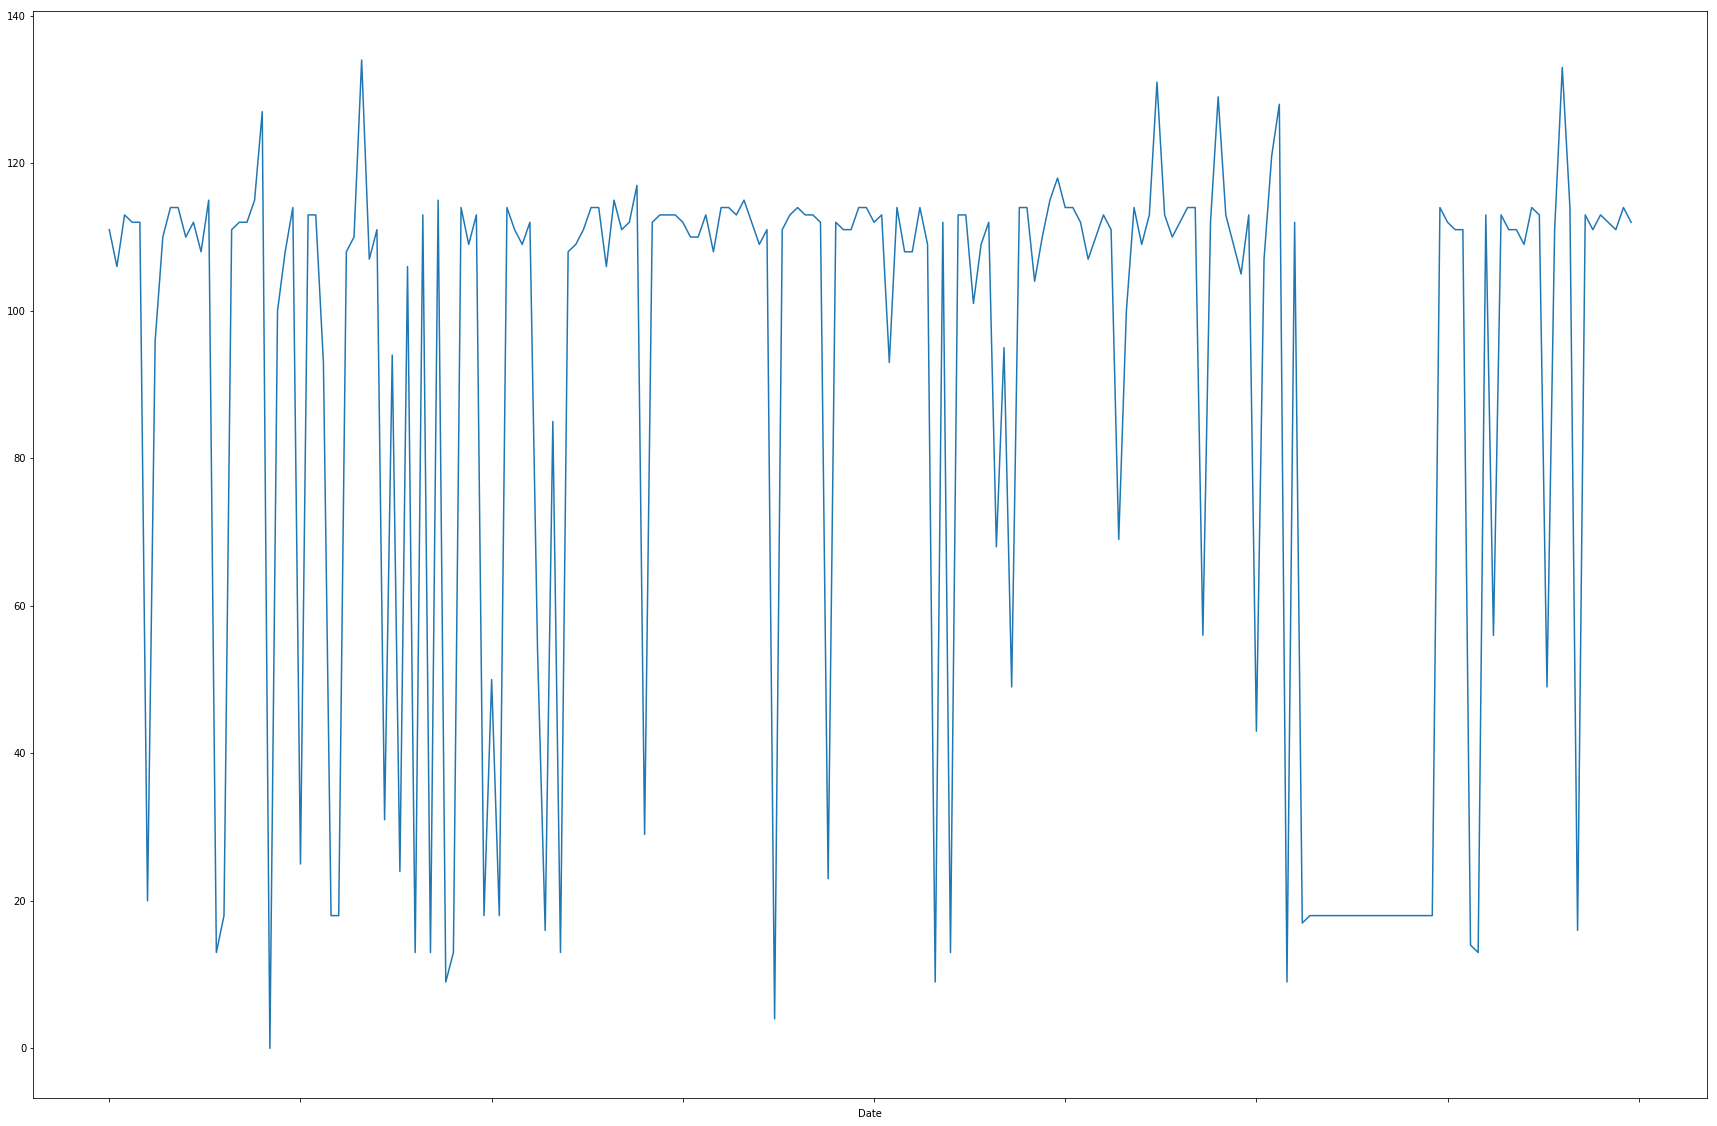

In [16]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])
tlen.plot(figsize=(30,20))

In [17]:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
* <a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>


In [18]:
percent = np.zeros(len(sources))
percent

array([0., 0.])

In [19]:
for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100
percent

array([1.98, 0.02])

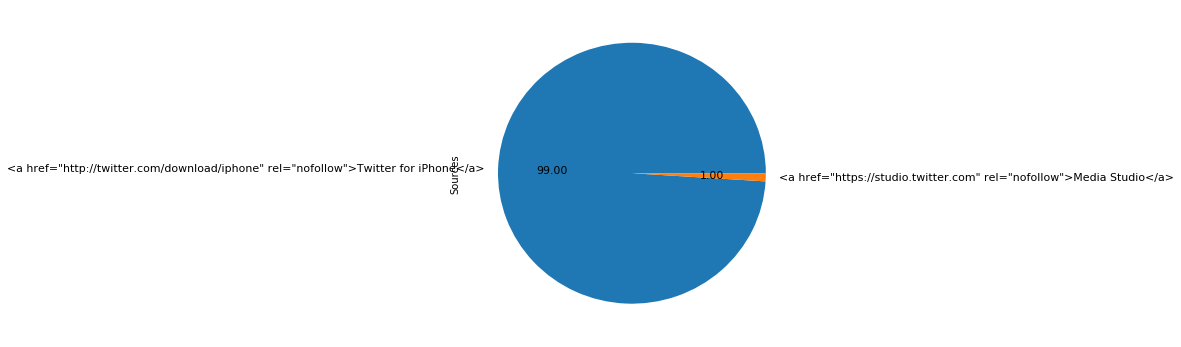

In [20]:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [25]:
from textblob import TextBlob
def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [26]:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,mexico should move the flag waving migrants ma...,111,1067015026995879937,Mon Nov 26 11:19:41 +0000 2018,"<a href=""http://twitter.com/download/iphone"" r...",44323,12463,-1
1,children from parents as did bush etc because ...,106,1066876053170339840,Mon Nov 26 02:07:27 +0000 2018,"<a href=""http://twitter.com/download/iphone"" r...",78648,20210,0
2,60minutes did a phony story about child separa...,113,1066873981293260801,Mon Nov 26 01:59:13 +0000 2018,"<a href=""http://twitter.com/download/iphone"" r...",70592,20955,1
3,clinton foundation donations drop 42 which sh...,112,1066793504804913152,Sun Nov 25 20:39:26 +0000 2018,"<a href=""http://twitter.com/download/iphone"" r...",97028,30246,-1
4,europe has to pay their fair share for militar...,112,1066790517944606721,Sun Nov 25 20:27:34 +0000 2018,"<a href=""http://twitter.com/download/iphone"" r...",70021,17690,1
5,general anthony tata,20,1066788767133040640,Sun Nov 25 20:20:36 +0000 2018,"<a href=""http://twitter.com/download/iphone"" r...",68384,17948,1
6,mississippi vote for cindyhydesmith on tuesday...,96,1066786854643662848,Sun Nov 25 20:13:00 +0000 2018,"<a href=""http://twitter.com/download/iphone"" r...",44932,12154,1
7,so great that oil prices are falling thank you...,110,1066689688600281088,Sun Nov 25 13:46:54 +0000 2018,"<a href=""http://twitter.com/download/iphone"" r...",99248,21200,1
8,would be very smart if mexico would stop the c...,114,1066685057648214018,Sun Nov 25 13:28:30 +0000 2018,"<a href=""http://twitter.com/download/iphone"" r...",112553,27615,1
9,the large and violent french protests dont tak...,114,1066682146683846657,Sun Nov 25 13:16:56 +0000 2018,"<a href=""http://twitter.com/download/iphone"" r...",68067,16412,-1


In [27]:
pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [28]:
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 49.0%
Percentage of neutral tweets: 38.5%
Percentage de negative tweets: 12.5%
